#### Khoa Điện tử Viễn thông- Trường Đại học Khoa học tự nhiên<br>
-------------------------------------------------------------------------
# <center>THIẾT KẾ LỌC IIR </center><br>

#### Mục đích:
> * Xác định được các thông số bộ lọc cần thiết kế <br>
> * Thiết kế được bộ lọc IIR <br>
> * Phân tích tích tín hiệu trước và sau lọc<br>

## Tóm tắt lý thuyết : <br>
Để thiết kế lọc IIR ta sử dụng các phương pháp sau: <br>
1. Sử dụng hàm signal.iirfilter()
$b, a = iirfilter(N, Wn, rp=None, rs=None, btype='band', analog=False,  ftype='butter', output='ba')$ <br>
Trong đó: <br>
> *N*: Bậc lọc <br>
> *Wn*: Là tần số góc chuẩn hóa có giá trị từ 0 -> 1. Đơn vị là rad/mẫu (lọc số) rad/s (lọc tương tự). Khi tần số cắt bằng tần số nyquist thì Wn = 1. <br>
> *rp*: Độ dợn sóng tối đa dải qua (dB) (Đối với lọc  Chebyshev và elliptic) <br>
> *rs*: Độ dợn sóng tối thiểu ở dải chặn (dB) (Đối với lọc  Chebyshev và elliptic) <br>
> *btype*: Loại lọc: 'bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’ <br>
> *analog*: Chọn loại lọc số hay lọc tương tự mặc định là lọc số <br>
> *ftype*: Loại lọc IIR cần thiết kế <br>

>> * Butterworth : ‘butter’
>> * Chebyshev I : ‘cheby1’
>> * Chebyshev II : ‘cheby2’
>> * Cauer/elliptic: ‘ellip’
>> * Bessel/Thomson: ‘bessel’

>> *output* : Mặc định là tạo ra các hệ số b, a


2. Sử dụng hàm signal.iirdesign()
$$b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype= 'ellip', output = 'ba')$$
Trong đó: <br>
> wp, ws: là tần số chuẩn hóa ở dải qua và tần số cắt chuẩn hóa ở dải chặn. Ví dụ: <br>

>> * Lowpass: wp = 0.2, ws = 0.3
>> * Highpass: wp = 0.3, ws = 0.2
>> * Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
>> * Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

>> *gpass*: Độ dợn sóng dải qua (dB) <br>
>> *gstop*: Độ dợn sóng dải chặn (dB) <br>
>> *analog*: Chọn loại lọc số hay lọc tương tự mặc định là lọc số <br>
>> *ftype*: Loại lọc IIR cần thiết kế <br>

>> * Butterworth : ‘butter’
>> * Chebyshev I : ‘cheby1’
>> * Chebyshev II : ‘cheby2’
>> * Cauer/elliptic: ‘ellip’
>> * Bessel/Thomson: ‘bessel’

>> *output* : Mặc định là tạo ra các hệ số b, a

3. Thiết kể theo kiểu Matlab
Các hàm có cú pháp giống trong Matlab<br>
Ví dụ:<br>

> * Thiết kế lọc Butterword:<br>
N, Wn = signal.buttord(wp, ws, gpass, gstop, analog=False) <br>
b, a = signal.butter(N, Wn, btype='low', analog=False, output='ba') <br>

> * Thiết kế lọc Chebyshev loại 1
N, Wn = signal.cheb1ord(wp, ws, gpass, gstop, analog=False) <br>
b, a =  signal.cheby1(N, rp, Wn, btype='low', analog=False, output='ba')

> * Tương tự đối với Chebyshev loại 2, Elliptic

Thêm thư viện vào project

In [ ]:
#Thêm thư viện
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#### Bài 1a:<br>
Chương trình  sau đây thực hiện tạo ra lọc IIR dải qua Chebyshev loại 2, bậc 4 và vẽ đáp ứng tần số của lọc thiết kế được

Text(0, 0.5, 'Amplitude [dB]')

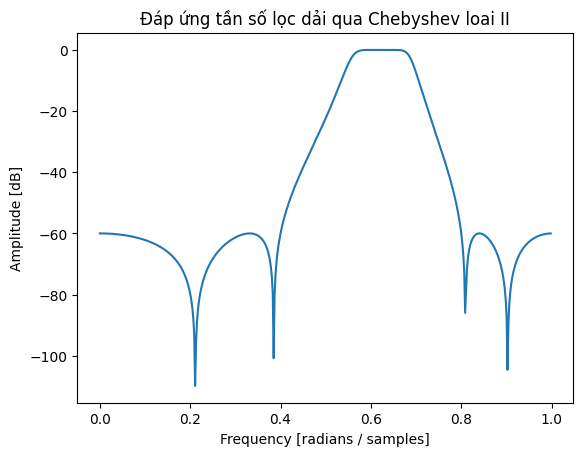

In [ ]:
b, a = signal.iirfilter(N = 4, Wn = [0.4, 0.8], rs=60, btype='band',
                        analog=False, ftype='cheby2')
w, H = signal.freqz(b, a, worN=512, whole = False)
plt.plot(w/np.pi, 20 * np.log10(abs(H)))
plt.title('Đáp ứng tần số lọc dải qua Chebyshev loai II')
plt.xlabel('Frequency [radians / samples]')
plt.ylabel('Amplitude [dB]')

#### Bài 1b: <br>
Chương trình để thiết kế lọc IIR thấp qua Chebyschev loại 2, bậc 8, tần số cắt là 10Hz, rs = 60. Áp dụng bộ lọc lên tín hiệu x. <br>
a. Vẽ đáp ứng tần số bộ lọc<br>
b. Vẽ tín hiệu vào và ra trên 1 hình


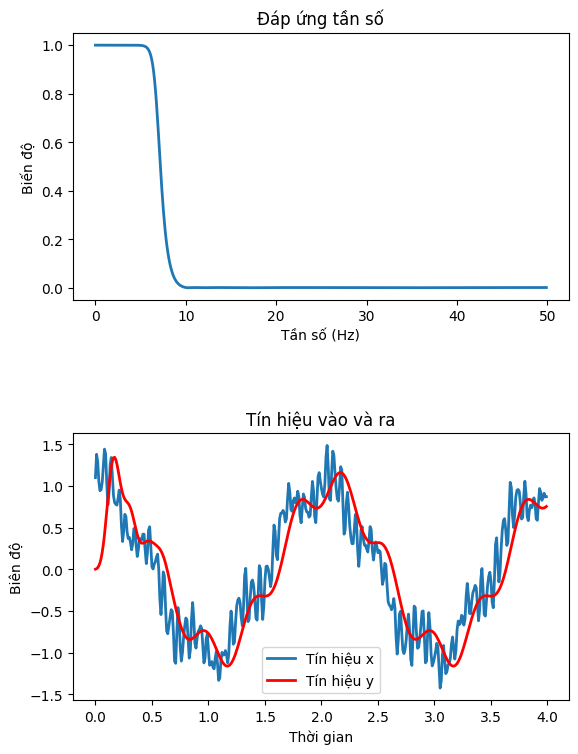

In [ ]:
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
nyquistRate = sampleRate/2 #Tần số Nyquist
cutOffFreq = 10 #Hz
#Viết tiếp chương trình ở đây
N = 8
wC = cutOffFreq/nyquistRate # Tần số cắt
b, a = signal.iirfilter(N, wC, rs=60, btype='low',analog=False, ftype='cheby2')
y = signal.lfilter(b, a, x)
w, H = signal.freqz(b,a, worN=512)
plt.subplot(2,1,1)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biến độ')
plt.subplot(2,1,2)
plt.plot(t, x, linewidth=2, label = 'Tín hiệu x')
plt.title('Tín hiệu vào và ra')
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.plot(t, y, 'r-', linewidth=2, label = 'Tín hiệu y')
plt.legend()#Hiển thị ghi chú
plt.subplots_adjust(top=1.5, hspace=0.5)

### Bài 2
Sử dụng hàm iirfilter() để thiết kế các mạch lọc sau

#### Bài 2a:<br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Butterworth thấp qua với các thông số sau: <br>
* Tần số cắt 0.5 (rad/samples)
* Bậc lọc N = 8

Text(0, 0.5, 'Amplitude')

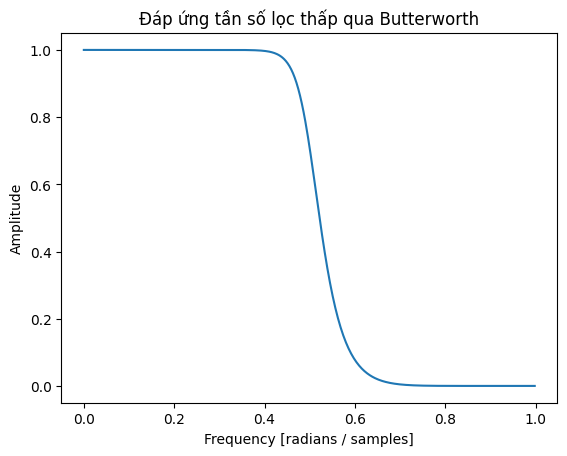

In [ ]:
b, a = signal.iirfilter(N = 8, Wn = 0.5, rs=50, btype='lowpass', analog=False, ftype='butter')
w, H = signal.freqz(b, a, worN=512, whole = False)
plt.plot(w/np.pi, (abs(H)))
plt.title('Đáp ứng tần số lọc thấp qua Butterworth')
plt.xlabel('Frequency [radians / samples]')
plt.ylabel('Amplitude')

#### Bài 2b: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 1 cao qua với các thông số sau: <br>
* Tần số cắt 0.5 (rad/sapmles)
* Bậc lọc N = 8
* rs = 50, rp = 0.5

Text(0, 0.5, 'Amplitude')

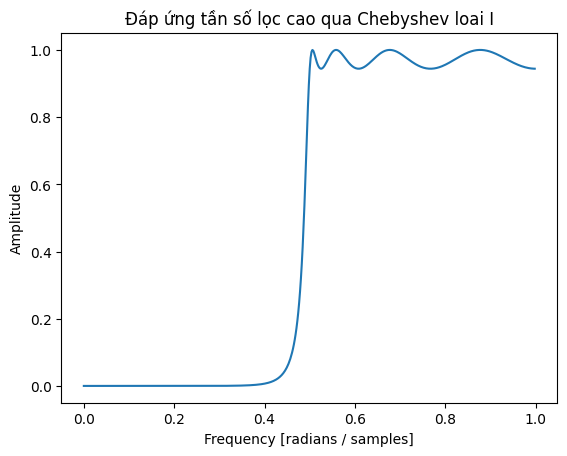

In [ ]:
b, a = signal.iirfilter(N = 8, Wn = 0.5,rp = 0.5, rs=50, btype='highpass', analog=False, ftype='cheby1')
w, H = signal.freqz(b, a, worN=512, whole = False)
plt.plot(w/np.pi, (abs(H)))
plt.title('Đáp ứng tần số lọc cao qua Chebyshev loai I')
plt.xlabel('Frequency [radians / samples]')
plt.ylabel('Amplitude')

#### Bài 2c:  <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 2 dải qua với các thông số sau: <br>
* Tần số cắt [0.3 0.5] (rad/sapmles)
* Bậc lọc N = 8
* rs = 50, rp = 0.5

Text(0, 0.5, 'Amplitude ')

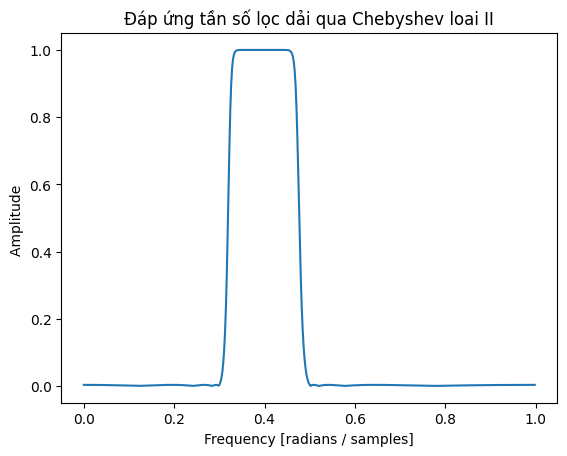

In [ ]:
b, a = signal.iirfilter(N = 8, Wn = [0.3, 0.5],rp = 0.5, rs=50, btype='bandpass', analog=False, ftype='cheby2')
w, H = signal.freqz(b, a, worN=512, whole = False)
plt.plot(w/np.pi,(abs(H)))
plt.title('Đáp ứng tần số lọc dải qua Chebyshev loai II')
plt.xlabel('Frequency [radians / samples]')
plt.ylabel('Amplitude ')

#### Bài 2d: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Elliptic dải chặn với các thông số sau: <br>
* Tần số cắt [0.3 0.5] (rad/sapmles)
* Bậc lọc N = 8
* rs = 50, rp = 0.5


Text(0, 0.5, 'Amplitude ')

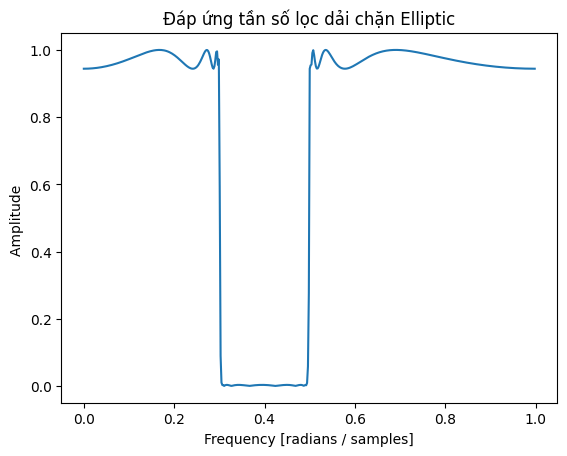

In [ ]:
b, a = signal.iirfilter(N = 8, Wn = [0.3, 0.5],rp = 0.5, rs=50, btype='bandstop', analog=False, ftype='ellip')
w, H = signal.freqz(b, a, worN=512, whole = False)
plt.plot(w/np.pi,(abs(H)))
plt.title('Đáp ứng tần số lọc dải chặn Elliptic')
plt.xlabel('Frequency [radians / samples]')
plt.ylabel('Amplitude ')

### Bài 3: <br>
Sử dụng hàm iirdesign() để thiết kế các mạch lọc sau

#### Bài 3a: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Butterworth thấp qua với các thông số sau: <br>
* Tần số cắt 0.5 (rad/sapmles)
* gpass = 0.5, gstop = 50


Text(0, 0.5, 'Biên độ')

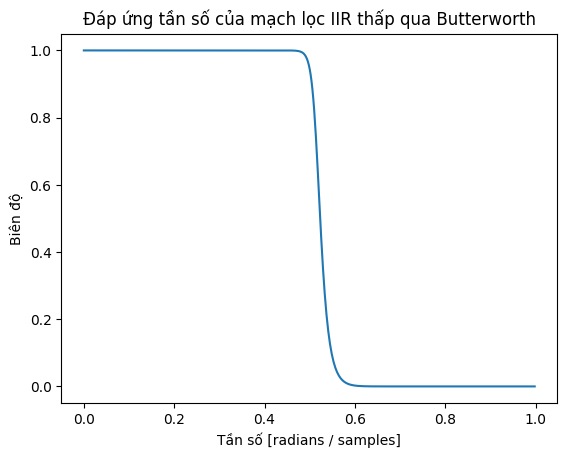

In [ ]:
wp = 0.5
ws = 0.6

b,a = signal.iirdesign(wp, ws, gpass=0.5, gstop=50, analog=False,ftype='butter')
w, h = signal.freqz(b,a, worN=512)

plt.plot(w/np.pi, (abs(h)))
plt.title('Đáp ứng tần số của mạch lọc IIR thấp qua Butterworth')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ')

#### Bài 3b: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 1 cao qua với các thông số sau: <br>
* Tần số cắt 0.5 (rad/sapmles)
* gstop = 50, pass = 0.5

Text(0, 0.5, 'Biên độ')

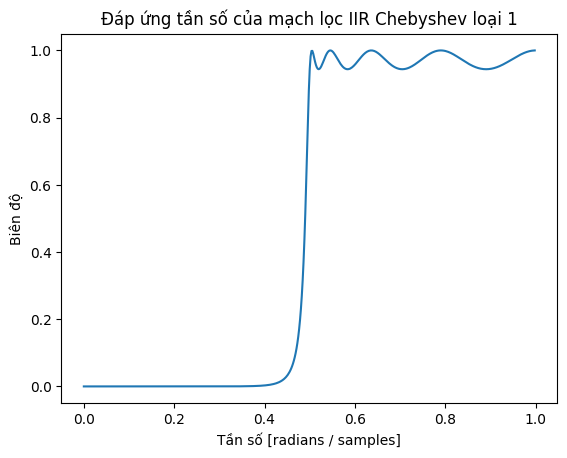

In [ ]:
wp = 0.5 # Tần số cắt
ws = 0.4
b,a = signal.iirdesign(wp, ws, gpass=0.5, gstop=50, analog=False,ftype='cheby1')
w, h = signal.freqz(b,a, worN=512)

plt.plot(w/np.pi, (abs(h)))
plt.title('Đáp ứng tần số của mạch lọc IIR Chebyshev loại 1')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ')

#### Bài 3c: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 2 dải qua với các thông số sau: <br>
* Tần số cắt [0.3 0.5] (rad/sapmles)
* gstop = 50, gpass = 0.5

Text(0, 0.5, 'Biên độ')

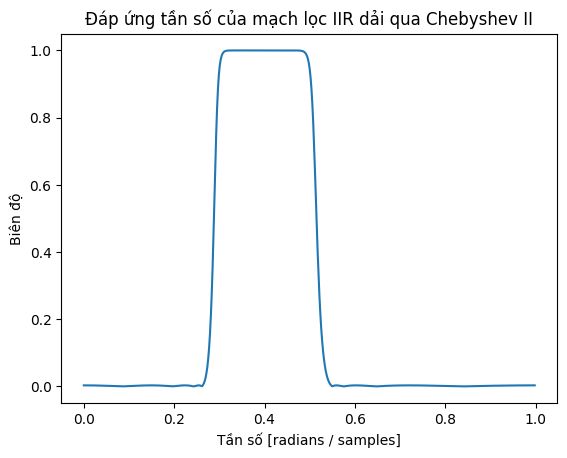

In [ ]:
wp = [0.3, 0.5]
ws = [0.25, 0.55]

b,a = signal.iirdesign(wp, ws, gpass=0.5, gstop=50, analog=False,ftype='cheby2')
w, h = signal.freqz(b,a, worN=512)

plt.plot(w/np.pi, (abs(h)))
plt.title('Đáp ứng tần số của mạch lọc IIR dải qua Chebyshev II')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ')

#### Bài 3d: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Elliptic dải chặn với các thông số sau: <br>
* Tần số cắt [0.3 0.5] (rad/sapmles)
* gstop = 50, gpass = 0.5

Text(0, 0.5, 'Biên độ')

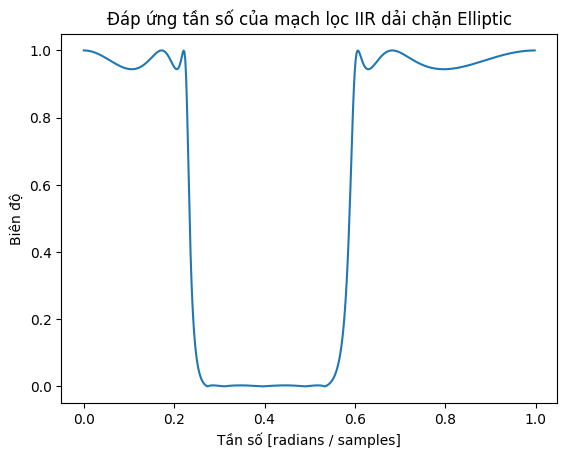

In [ ]:
wp = [0.2, 0.6]
ws = [0.3, 0.5]

b,a = signal.iirdesign(wp, ws, gpass=0.5, gstop=50, analog=False,ftype='ellip')
w, h = signal.freqz(b,a, worN=512)

plt.plot(w/np.pi, (abs(h)))
plt.title('Đáp ứng tần số của mạch lọc IIR dải chặn Elliptic')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ')

### Bài 4: <br>
Thiết kế và vẽ đáp ứng tần số trên cùng 1 hình của các mạch lọc IIR thấp qua loại: Butterworth, Chebyshev loại 1, Chebyshev loại 2 và Elliptic  với các thông số sau: <br>
* Tần số cắt 0.5 (rad/sapmles)
* Bậc lọc N = 15
* gstop = 50, gpass = 0.5

Nhận xét về độ gợn sóng và độ rộng chuyển tiếp của các loại lọc

Text(0, 0.5, 'Biên độ (dB)')

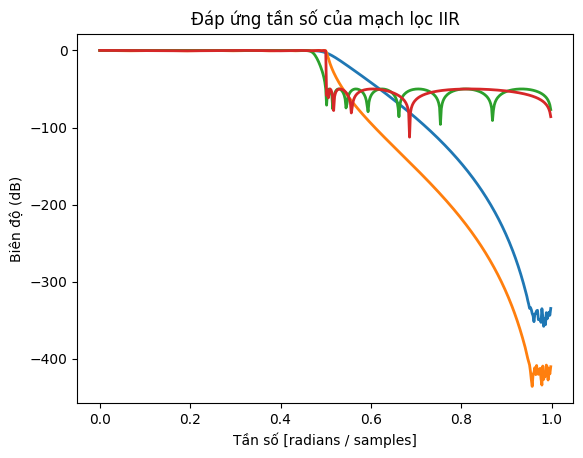

In [ ]:
N = 15
Wn = 0.5

b1,a1 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='butter')
b2,a2 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby1')
b3,a3 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby2')
b4,a4 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='ellip')
w1, H1 = signal.freqz(b1,a1, worN=512)
w2, H2 = signal.freqz(b2,a2, worN=512)
w3, H3 = signal.freqz(b3,a3, worN=512)
w4, H4 = signal.freqz(b4,a4, worN=512)

plt.plot(w/np.pi, 20*np.log10(abs(H1)), linewidth = 2, label= 'butter')
plt.plot(w/np.pi, 20*np.log10(abs(H2)), linewidth = 2, label= 'cheby1')
plt.plot(w/np.pi, 20*np.log10(abs(H3)), linewidth = 2, label= 'cheby2')
plt.plot(w/np.pi, 20*np.log10(abs(H4)), linewidth = 2, label= 'ellip')
plt.title('Đáp ứng tần số của mạch lọc IIR')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ (dB)')

(-3.0, 2.0)

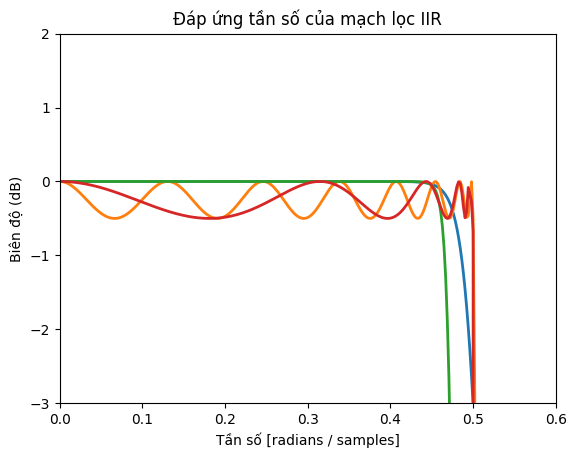

In [ ]:
#Giới hạn y để xem độ gợn sóng dải qua plt.xlim(0, 0.6) plt.ylim(-3, 2)
N = 15
Wn = 0.5

b1,a1 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='butter')
b2,a2 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby1')
b3,a3 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby2')
b4,a4 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='ellip')
w1, H1 = signal.freqz(b1,a1, worN=512)
w2, H2 = signal.freqz(b2,a2, worN=512)
w3, H3 = signal.freqz(b3,a3, worN=512)
w4, H4 = signal.freqz(b4,a4, worN=512)

plt.plot(w/np.pi, 20*np.log10(abs(H1)), linewidth = 2, label= 'butter')
plt.plot(w/np.pi, 20*np.log10(abs(H2)), linewidth = 2, label= 'cheby1')
plt.plot(w/np.pi, 20*np.log10(abs(H3)), linewidth = 2, label= 'cheby2')
plt.plot(w/np.pi, 20*np.log10(abs(H4)), linewidth = 2, label= 'ellip')
plt.title('Đáp ứng tần số của mạch lọc IIR')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ (dB)')
plt.xlim(0, 0.6)
plt.ylim(-3, 2)

(-50.0, 2.0)

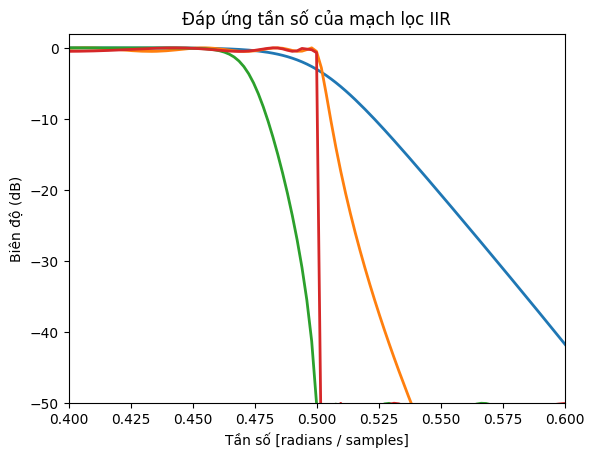

In [ ]:
#Giới hạn để xem độ rộng chuyển tiếp plt.xlim(0.4, 0.6) plt.ylim(-50, 2)
N = 15
Wn = 0.5

b1,a1 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='butter')
b2,a2 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby1')
b3,a3 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='cheby2')
b4,a4 = signal.iirfilter(N, Wn, rp=0.5, rs=50, btype='lowpass', analog=False,  ftype='ellip')
w1, H1 = signal.freqz(b1,a1, worN=512)
w2, H2 = signal.freqz(b2,a2, worN=512)
w3, H3 = signal.freqz(b3,a3, worN=512)
w4, H4 = signal.freqz(b4,a4, worN=512)

plt.plot(w/np.pi, 20*np.log10(abs(H1)), linewidth = 2, label= 'butter')
plt.plot(w/np.pi, 20*np.log10(abs(H2)), linewidth = 2, label= 'cheby1')
plt.plot(w/np.pi, 20*np.log10(abs(H3)), linewidth = 2, label= 'cheby2')
plt.plot(w/np.pi, 20*np.log10(abs(H4)), linewidth = 2, label= 'ellip')
plt.title('Đáp ứng tần số của mạch lọc IIR')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ (dB)')
plt.xlim(0.4, 0.6)
plt.ylim(-50, 2)


### Bài 5: <br>
Vẽ đáp ứng tần số và so sánh 2 loại lọc FIR và lọc IIR Butterworth cùng thông số sau: <br>
* Tần số cắt: Wn = 0.5
* Loại lọc: thấp qua
* Bậc lọc: 15

(-50.0, 10.0)

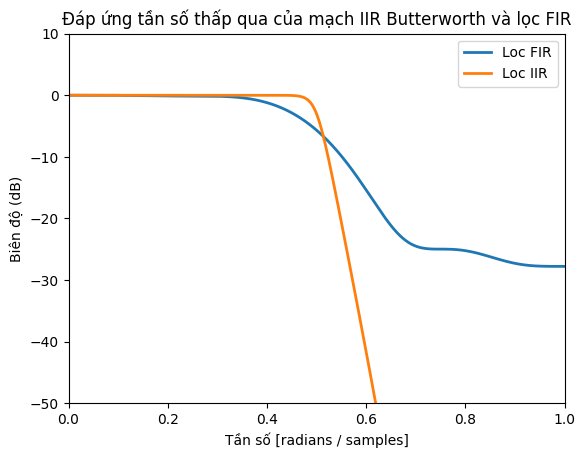

In [ ]:
Wn = 0.5
N = 15
b, a = signal.iirfilter(N, Wn = 0.5, rp = 0.5, rs=50, btype='lowpass', analog=False, ftype='butter')
w, H1 = signal.freqz(b, a, worN=1024, whole = False)

b_fir = signal.firwin(N, Wn, window="triang")
w, H2 = signal.freqz(b_fir,1, worN=1024)

plt.plot(w/np.pi, 20*np.log10(abs(H1)), linewidth=2, label="Loc IIR")
plt.plot((w/np.pi), 20*np.log10(abs(H2)), linewidth=2, label= "Loc FIR")

plt.title('Đáp ứng tần số thấp qua của mạch IIR Butterworth và lọc FIR')
plt.xlabel('Tần số [radians / samples]')
plt.ylabel('Biên độ (dB)')
plt.legend()
plt.xlim(0, 1)
plt.ylim(-50, 10)

### Bài 6: <br>
Cho tín hiệu x. Thực hiện mạch lọc IIR để<br>
a. Loại bỏ tín hiệu 0.5Hz và 2.5Hz. <br>
b. Chỉ giữ lại tần số 15.3Hz

Vẽ đáp ứng tần số của lọc (theo Hz). Vẽ tín hiệu vào và ra trên 1 hình

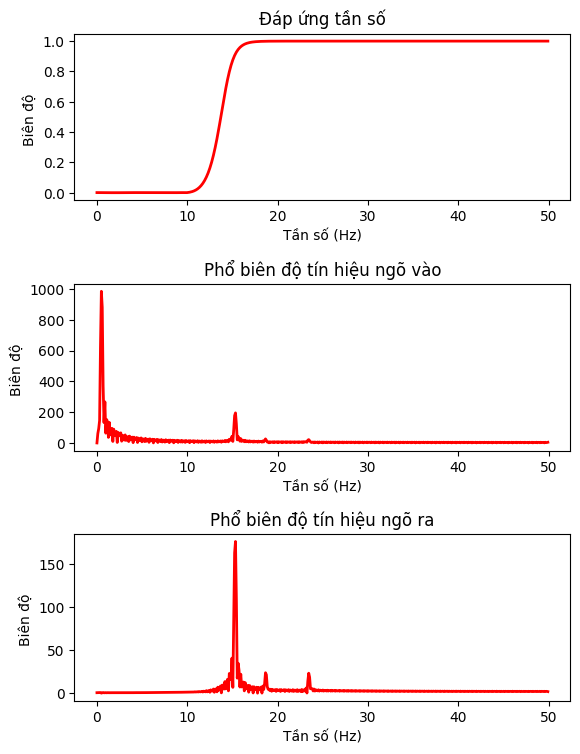

In [ ]:
#Câu a: Loại bỏ tần số 0.5Hz và 2.5Hz
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = 5*np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*18.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
#Viết tiếp chương trình ở đây
w, X = signal.freqz(x, worN=512)
nyquistRate = sampleRate/2 #Tần số Nyquist
cutOffFreq = 10 #Hz
N = 8
wC = cutOffFreq/nyquistRate # Tần số cắt
b, a = signal.iirfilter(N, wC, rs=60, btype='highpass',analog=False, ftype='cheby2')
y = signal.lfilter(b, a, x)
w, H = signal.freqz(b,a, worN=512)
w, Y = signal.freqz(y, worN=512)

plt.subplot(3, 1, 1)
plt.plot((w/np.pi)*nyquistRate, abs(H), 'r-', linewidth=2, label = 'Tín hiệu X')
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplot(3, 1, 2)
plt.plot((w/np.pi)*nyquistRate, abs(X), 'r-', linewidth=2, label = 'Tín hiệu X')
plt.title('Phổ biên độ tín hiệu ngõ vào')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplot(3, 1, 3)
plt.plot((w/np.pi)*nyquistRate, abs(Y), 'r-', linewidth=2, label = 'Tín hiệu Y')
plt.title('Phổ biên độ tín hiệu ngõ ra')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplots_adjust(top=1.5, hspace=0.5)

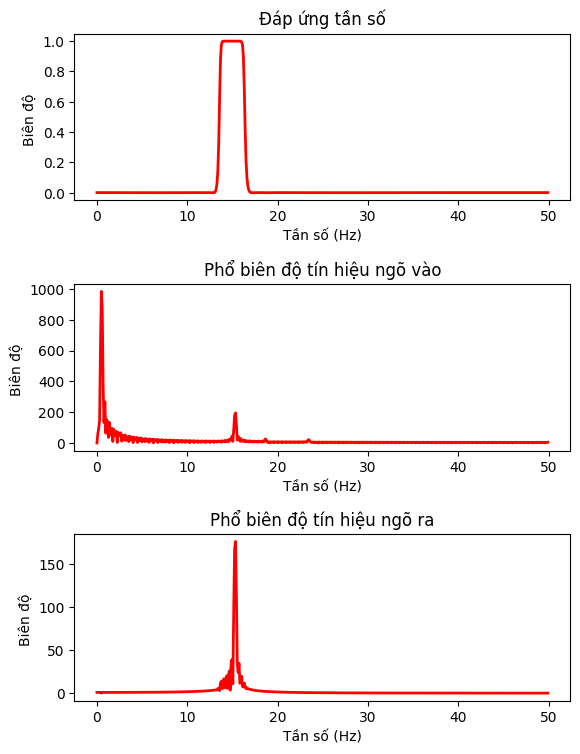

In [ ]:
#Câu b chỉ giữ lại tần số 15.3Hz
sampleRate = 100 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
x = 5*np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
        np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*18.7*t + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*t+.8)
w, X = signal.freqz(x, worN=512)

nyquistRate = sampleRate/2 #Tần số Nyquist
cutOffFreq = [13,17] #Hz
N = 8
wC = [cutOffFreq[0]/nyquistRate, cutOffFreq[1]/nyquistRate] # Tần số cắt
b, a = signal.iirfilter(N, wC, rp = 0.5, rs=60, btype='bandpass',analog=False, ftype='cheby2')
y = signal.lfilter(b, a, x)
w, H = signal.freqz(b,a, worN=512)
w, Y = signal.freqz(y, worN=512)

plt.subplot(3, 1, 1)
plt.plot((w/np.pi)*nyquistRate, abs(H), 'r-', linewidth=2, label = 'Tín hiệu X')
plt.title('Đáp ứng tần số')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplot(3, 1, 2)
plt.plot((w/np.pi)*nyquistRate, abs(X), 'r-', linewidth=2, label = 'Tín hiệu X')
plt.title('Phổ biên độ tín hiệu ngõ vào')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplot(3, 1, 3)
plt.plot((w/np.pi)*nyquistRate, abs(Y), 'r-', linewidth=2, label = 'Tín hiệu Y')
plt.title('Phổ biên độ tín hiệu ngõ ra')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplots_adjust(top=1.5, hspace=0.5)

### Bài 7: <br>
Cho file âm thanh gốc là "violin_origional.wav'" và file âm thanh gồm nhiễu "violin_noise.wav" <br>
a. Phân tích phổ của 2 file trên<br>
b. Xác định tần số của nhiễu <br>
c. Thiết kế mạch lọc IIR để loại nhiễu trong file "violin_noise.wav" <br>
d. So sánh với lọc FIR đã thực hiện ở bài trước

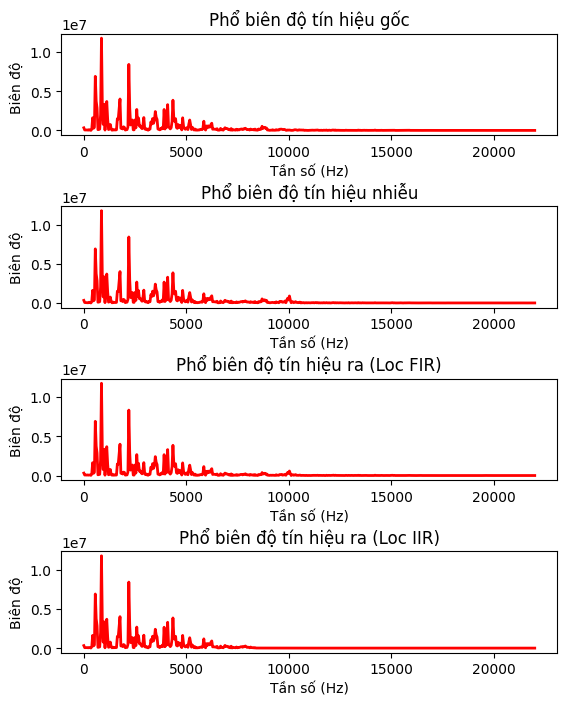

In [ ]:
 #Thư viện
from scipy.io import wavfile
from scipy import fftpack as fft
from scipy import signal
import IPython.display as ipd #Thêm thư viện để play Audio
# Đọc file
file_original= 'violin_origional.wav'
file_nhieu = 'violin_noise.wav'
fs, s_original = wavfile.read(file_original)
fs, s_nhieu = wavfile.read(file_nhieu)
nyquistRate = fs/2
#Sinh viên thêm đoạn code vào đây
#begin
w, S_original = signal.freqz(s_original, 1)
w, S_nhieu = signal.freqz(s_nhieu, 1)
# Tần số nhiễu là 10 kHz nên tần số cắt là 9 kHz
cutOffFreq = 9000 # Hz
N = 15
Wn = cutOffFreq/nyquistRate # Tần số cắt
b, a = signal.iirfilter(N, Wn, rp=0.5, rs=60, btype='lowpass',analog=False, ftype='cheby2')
y = signal.lfilter(b, a, s_nhieu)
w, Y = signal.freqz(y, worN=512)

b_fir = signal.firwin(N, wC, window="triang")
y2 = signal.lfilter(b_fir, 1, s_nhieu) # Tín hiệu ngõ ra
w, Y2 = signal.freqz(y2, worN=512)

plt.subplot(4, 1, 1)
plt.plot((w/np.pi)*nyquistRate, np.abs(S_original), 'r-', linewidth=2, label = 'Tín hiệu gốc')
plt.title('Phổ biên độ tín hiệu gốc')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ ')
plt.subplot(4, 1, 2)
plt.plot((w/np.pi)*nyquistRate, np.abs(S_nhieu), 'r-', linewidth=2, label = 'Tín hiệu nhiễu')
plt.title('Phổ biên độ tín hiệu nhiễu')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(4, 1, 3)
plt.plot((w/np.pi)*nyquistRate, np.abs(Y2), 'r-', linewidth=2, label = 'Tín hiệu ra (Loc FIR)')
plt.title('Phổ biên độ tín hiệu ra (Loc FIR)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(4, 1, 4)
plt.plot((w/np.pi)*nyquistRate, np.abs(Y), 'r-', linewidth=2, label = 'Tín hiệu ra (Loc IIR)')
plt.title('Phổ biên độ tín hiệu ra (Loc IIR)')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplots_adjust(top=1.4, hspace=0.7)
#end
#Tạo file wav để nghe lại với y là tín hiệu sau lọc
y_wav = np.array(y, dtype='int16') #Định dạng lại âm thanh 16 bit
wavfile.write("violin_filtered.wav", fs,y_wav)

In [ ]:
# Lọc IIR lọc nhiễu tốt hơn FIR